TESTING_TASK(FOR CARScan INTERNSHIP)

THE FOLLOWING NOTEBOOK INCLUDES:
1. FOREGROUND EXTRACTION
2. BACKGROUND CHANGE<BREAK>
  
   
1. I HAVE USED MASK-RCNN MODEL TO EXTRACT THE CARS FROM THEIR BACKGROUND AS CAN BE SEEN IN THE RESULTS. SINCE SUCH A MODEL    WOULD TAKE A LOT OF TIME TO TRAIN, I HAVE USED A PRE-TRAINED MODEL, TRAINED OVER MS-COCO DATASET. 

2. I HAVE USED THE PIXELLIB TO EXTRACT BACKGROUND AND FOREGOROUND AND WITH THE HELP OF DEEPLAB INCEPTION MODEL MERGED THEM    TOGETHER THUS CHANGING THE BACKGROUND OF MY ORIGINAL IMAGE.THE RESULTS OF THIS TASK HAVE BEEN NAMED AS new_imgx.png AND    IS INCLUDED WITHIN THIS FOLDER

In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle
 

Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
Use `tf.cast` instead.


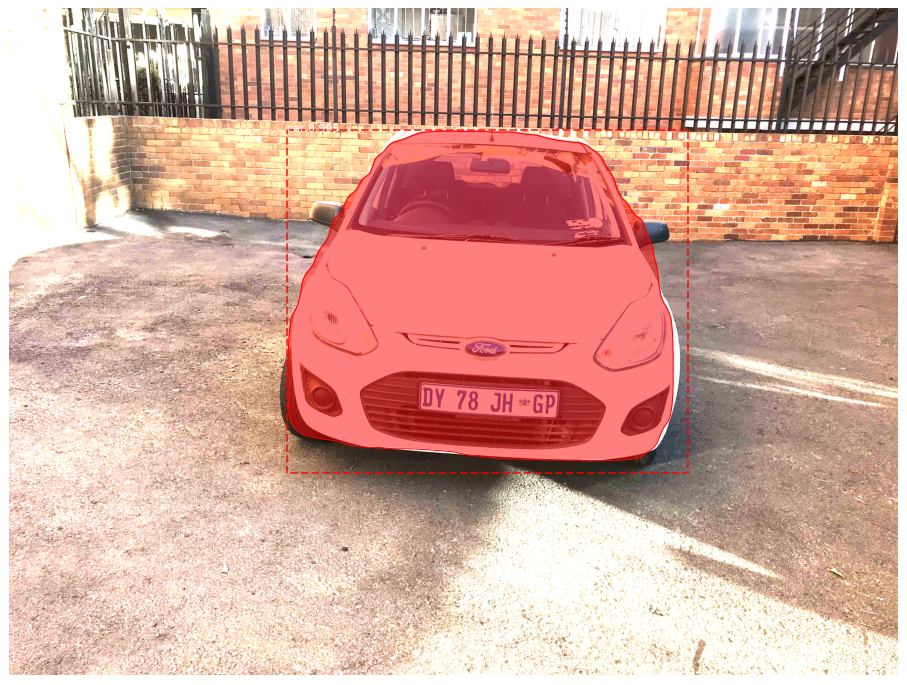

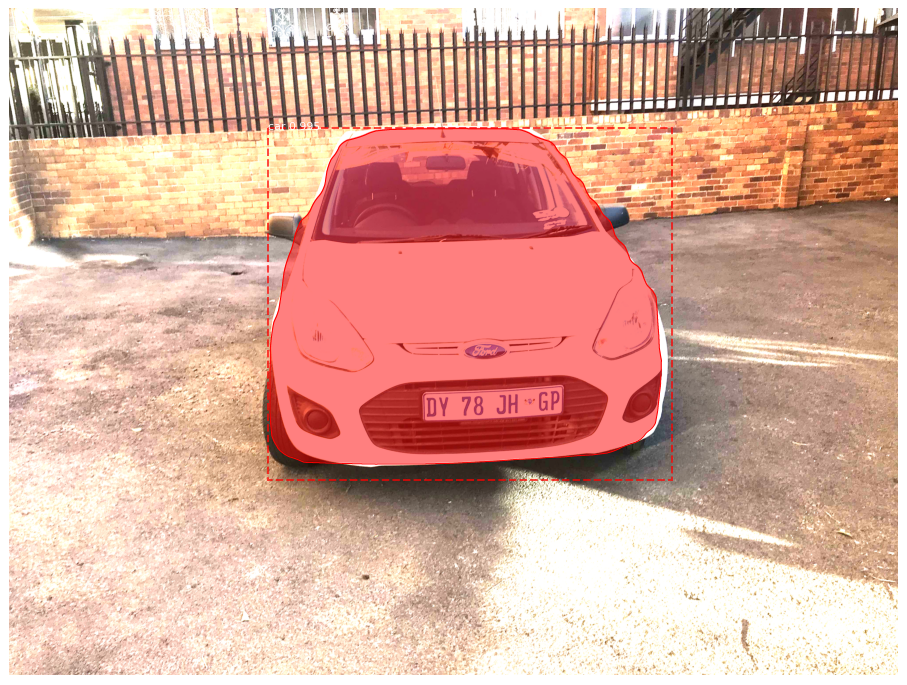

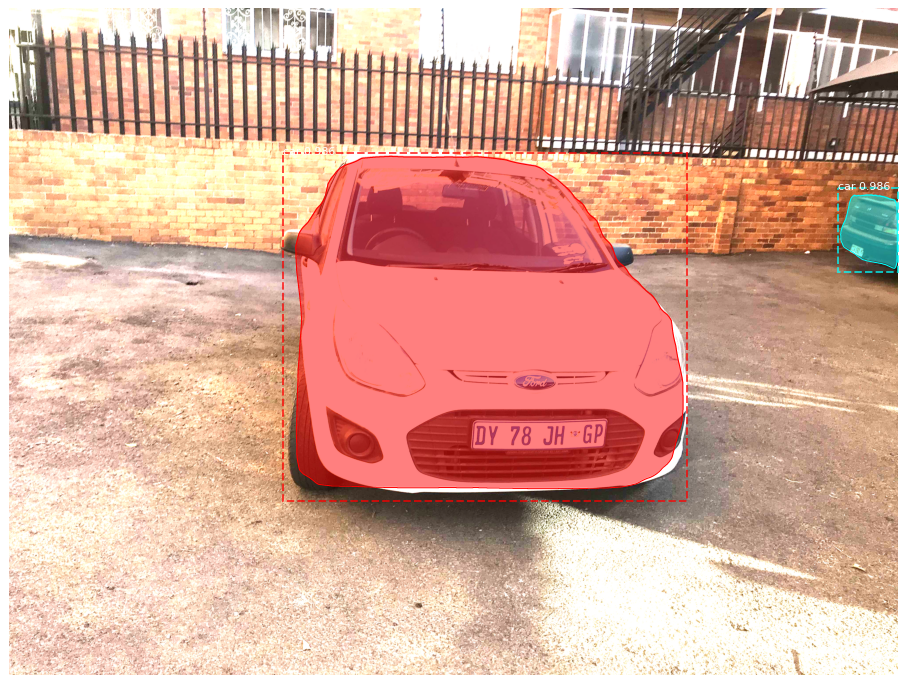

In [2]:
from keras.preprocessing.image import apply_brightness_shift
from mrcnn.visualize import display_instances
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
import cv2

class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']
 

class TestConfig(Config):
        NAME = "test"
        GPU_COUNT = 1
        IMAGES_PER_GPU = 1
        NUM_CLASSES = 1 + 80
 




rcnn = MaskRCNN(mode='inference', model_dir='C:/Users/ASHWIN/Desktop/Mask_RCNN', config=TestConfig())

rcnn.load_weights('mask_rcnn_coco.h5', by_name=True)


img1 =  load_img('view1.jpeg')
img1 = apply_brightness_shift(img1,2.5)
img1 = img_to_array(img1)

results1 = rcnn.detect([img1], verbose=0)

r1 = results1[0]

display_instances(img1, r1['rois'], r1['masks'],r1['class_ids'], class_names, r1['scores'])

img2 =  load_img('view2.jpeg')
img2 = apply_brightness_shift(img2,2.5)
img2 = img_to_array(img2)

results2 = rcnn.detect([img2], verbose=0)

r2 = results2[0]
display_instances(img2, r2['rois'], r2['masks'],r2['class_ids'], class_names, r2['scores'])

img3 =  load_img('view3.jpeg')
img3 = img_to_array(img3)
img3 = apply_brightness_shift(img3,2.5)
results3 = rcnn.detect([img3], verbose=0)

r3 = results3[0]

display_instances(img3, r3['rois'], r3['masks'], r3['class_ids'], class_names, r3['scores'])



In [3]:
mask1 = r1['masks'].astype(int)
mask2 = r2['masks'].astype(int)
mask3 = r3['masks'].astype(int)

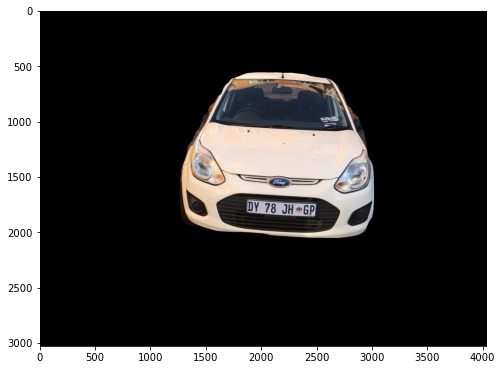

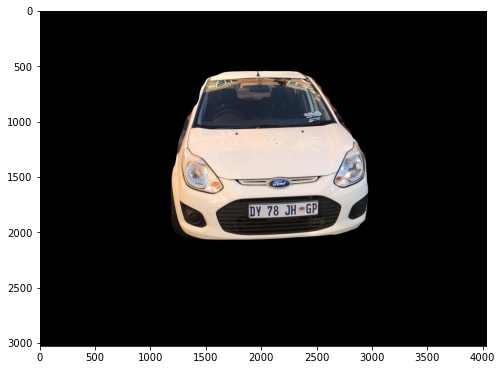

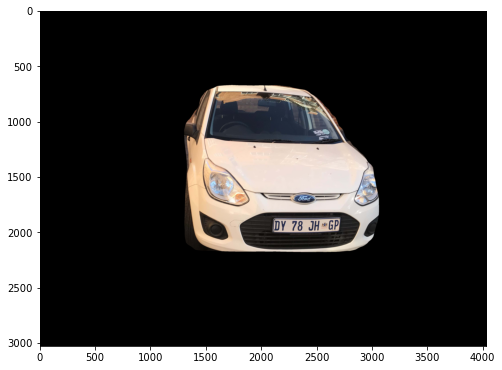

In [4]:
import skimage
for i in range(mask1.shape[2]):
    temp1 = skimage.io.imread('view1.jpeg')
    for j in range(temp1.shape[2]):
        temp1[:,:,j] = temp1[:,:,j] * mask1[:,:,i]
    pyplot.figure(figsize=(8,8))
    pyplot.imshow(temp1)
    
for i in range(mask2.shape[2]):
    temp2 = skimage.io.imread('view2.jpeg')
    for j in range(temp2.shape[2]):
        temp2[:,:,j] = temp2[:,:,j] * mask2[:,:,i]
    pyplot.figure(figsize=(8,8))
    pyplot.imshow(temp2)


temp3 = skimage.io.imread('view3.jpeg')
for j in range(temp3.shape[2]):
    temp3[:,:,j] = temp3[:,:,j] * mask3[:,:,1]
pyplot.figure(figsize=(8,8))
pyplot.imshow(temp3)


In [5]:
import pixellib
from pixellib.tune_bg import alter_bg


change_bg = alter_bg()
change_bg.load_pascalvoc_model("C:/Users/ASHWIN/Desktop/Mask_RCNN/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")
change_bg.change_bg_img(f_image_path = "view1.jpeg",b_image_path = "garage-parking-parking-lot-underground.jpg", output_image_name="new_img1.jpg")
change_bg.change_bg_img(f_image_path = "view2.jpeg",b_image_path = "background.png", output_image_name="new_img2.jpg")
change_bg.change_bg_img(f_image_path = "view3.jpeg",b_image_path = "background.png", output_image_name="new_img3.jpg")


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)